Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Adding all planners
===========


In [1]:
import sys
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

In [2]:
from IPPerfMonitor import IPPerfMonitor

import IPBasicPRM
import IPVISBasicPRM
import IPBasicPRM_Roundtrip

import IPVisibilityPRM
import IPVISVisibilityPRM

#import IPKClosestPRM # for visualization IKVISBasicPRM is used

import IPLazyPRM
import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [3]:
plannerFactory = dict()

basicConfig = dict()
basicConfig["radius"] = 3
basicConfig["numNodes"] = 200
plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]


plannerFactory["basePRM2"] = [IPBasicPRM.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]

visbilityConfig = dict()
visbilityConfig["ntry"] = 300
plannerFactory["visibilityPRM"] = [IPVisibilityPRM.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]

lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 10
lazyConfig["updateRoadmapSize"]  = 5 
lazyConfig["kNearest"] = 8
plannerFactory["lazyPRM"] = [IPLazyPRM.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [4]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [5]:
import IPTestSuiteSS2023
import importlib

In [6]:
importlib.reload(IPTestSuiteSS2023)

<module 'IPTestSuiteSS2023' from '/home/maurice/Dokumente/Projekt_Roboterprogrammierung/Projekt_GIT/RKIM23RobotProgramDS/01_gegebeneNotebooks/IPTestSuiteSS2023.py'>

In [7]:
fullBenchList = IPTestSuiteSS2023.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
Spirals
B_rush
Triangle fun
busv1013
Wall of Dots
FunFunFun
Snowman
circle od death
Multibottleneck
House of the rising sun
Boring
Person
Linien
osm_field
4 Rechtecke
5er Würfel
Gitter
Labyrinth
FindMyWay
channing
never_ending_spiral
vojo_1020


In [8]:
resultList = list()
testList = fullBenchList[0:3]

for key,producer in list(plannerFactory.items()):
    print(key, producer)
    for benchmark in testList:
        print ("Planning: " + key + " - " + benchmark.name)
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        try:
            #pfadhin = planner.planPathRound(benchmark.startList,benchmark.goalList,producer[1])
            #pfadzurueck = planner.planPathRound(benchmark.goalList,benchmark.startList,producer[1])
            #solution = pfadhin
            #print(solution)
            resultList.append(ResultCollection(key,
                                           planner, 
                                           benchmark, 
                                           planner.planRoundPath(benchmark.startList,benchmark.goalList,producer[1]),
                                           IPPerfMonitor.dataFrame()
                                          ),
                        )
            #a = planner.planPath(benchmark.startList,benchmark.goalList,producer[1])
            # 
        except Exception as e:
        #    throw e
            print ("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR ")
            pass
            



basePRM [<class 'IPBasicPRM_Roundtrip.BasicPRM'>, {'radius': 3, 'numNodes': 200}, <function basicPRMVisualize at 0x7fcc750c93a0>]
Planning: basePRM - Trap
Planning: basePRM - Bottleneck
Planning: basePRM - Fat bottleneck
basePRM2 [<class 'IPBasicPRM.BasicPRM'>, {'radius': 3, 'numNodes': 200}, <function basicPRMVisualize at 0x7fcc750c93a0>]
Planning: basePRM2 - Trap
PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR 
Planning: basePRM2 - Bottleneck
PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR 
Planning: basePRM2 - Fat bottleneck
PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR 
visibilityPRM [<class 'IPVisibilityPRM.VisPRM'>, {'ntry': 300}, <function visibilityPRMVisualize at 0x7fcc2d2e4360>]
Planning: visibilityPRM - Trap
PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR 
Planning: visibilityPRM - Bottleneck
PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR 
Planning: visibilityPRM - Fat bottleneck
PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR 
lazyPRM [<class 'IPLazyPRM.LazyPRM'>, 

/home/maurice/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/home/maurice/anaconda3/lib/python3.11/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


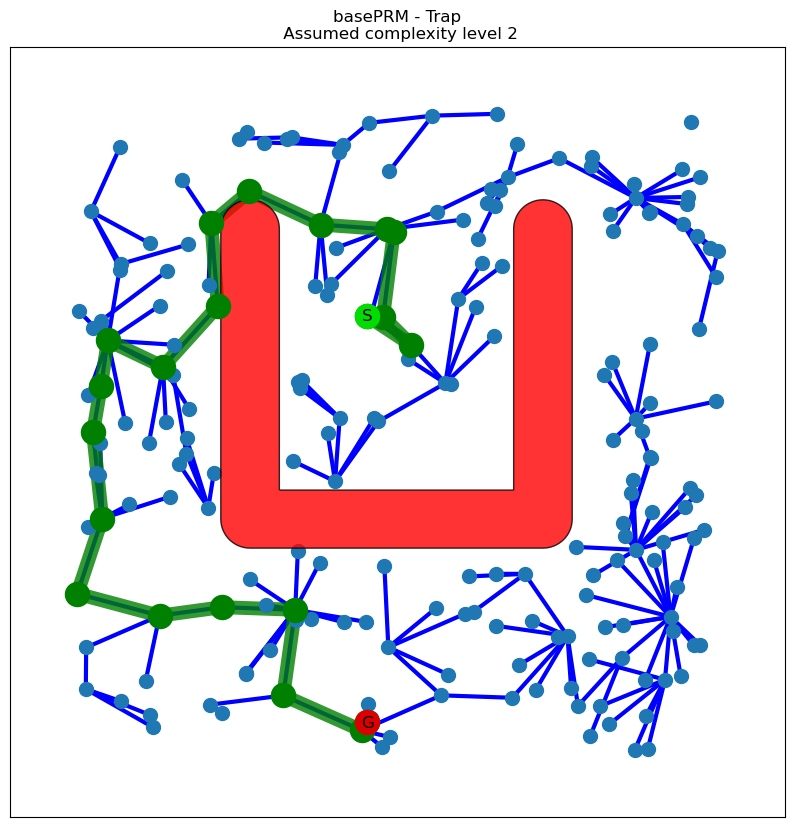

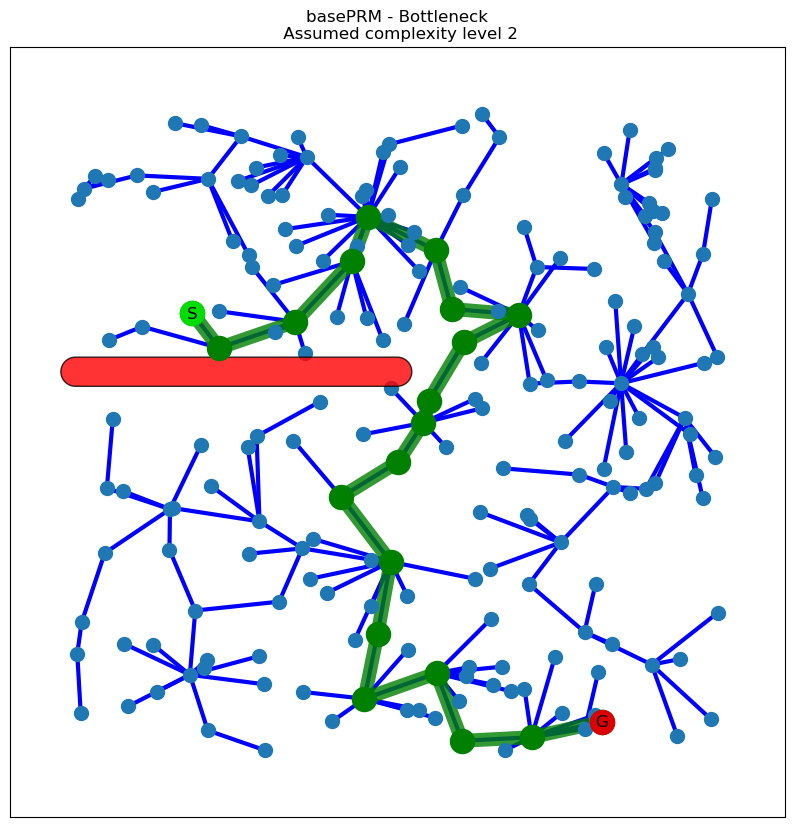

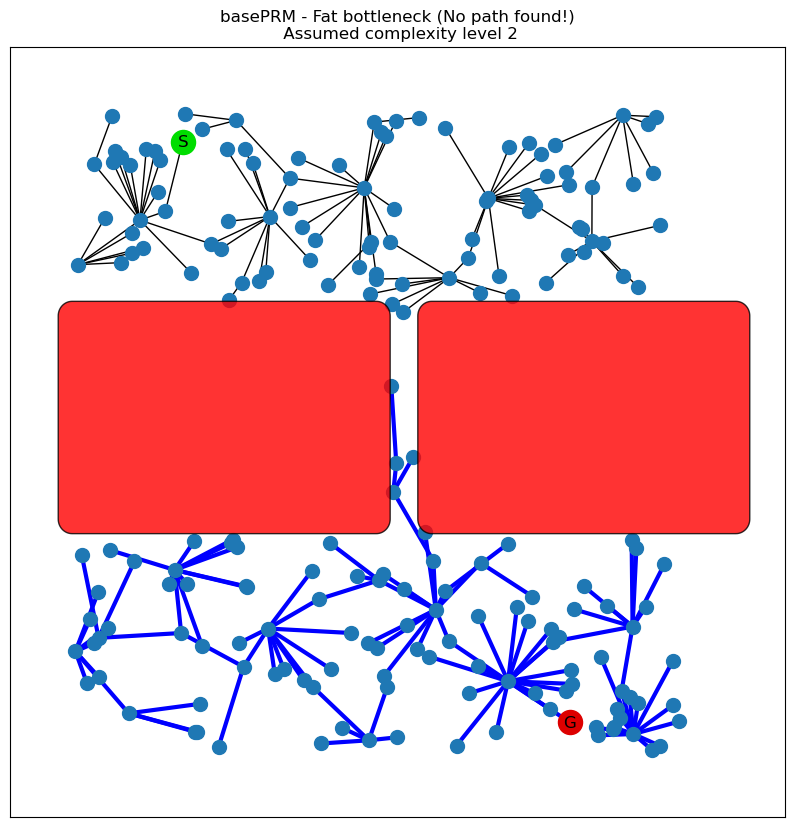

In [9]:
import matplotlib.pyplot as plt

for result in resultList:
    
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)
    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)
    except Exception as e:
        print ("Error")
        print(e)
        pass
    

In [10]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [11]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

,time
name,
_getRandomFreePosition,0.011439
_inSameConnectedComponent,0.025012
_learnRoadmapNearestNeighbour,0.373278
_nearestNeighbours,0.112125
lineInCollision,0.226029
planRoundPath,0.378849
pointInCollision,0.193377


In [12]:
result.perfDataFrame[result.perfDataFrame["name"]=="planPath"]

,name,args,kwargs,retVal,time


In [13]:
result.perfDataFrame[result.perfDataFrame["name"]=="planPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

/tmp/ipykernel_22450/2675505771.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0